In [13]:
"""
Notation used in this notebook

ells            - array of ells to Lmax
pcls            - C_ells defined through a power law
check_cls       - C_ells from anafast on a map

sbb             - amplitude map/template map
beta_map        - map of the varying beta

sed_scaling_<x> - scaled_synch function on frequencies. nu^beta_map

newmaps_<x>     - template map * sed_scaling map. Series of freq maps

""";

In [14]:
%load_ext autoreload
# to make modification in .py file type %autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
#trying to consolidate the work so far into a cohesive document and notation. Pushing definitions into separate .py file


#------packages-------------------
%pylab inline
import time
import foreground_functions as ff

#-------BB parameters (to start)--------
A_BB = 1.7e3
alpha_BB = -3.0
beta_BB = -3.2
beta_sigma = 1.5e-6
nu0 = 2.3e9

#-------map paramters--------------------
nside = 128
Lmax = 384
ells = np.arange(1,Lmax+1)

#define list of frequencies going from 10 to 300 GHz, sampling 20 points
freqs = np.linspace(10,300,20)*1.e9

Populating the interactive namespace from numpy and matplotlib


In [30]:
%autoreload

In [67]:
maps = ff.generate_map(384, A_BB, alpha_BB, beta_sigma, freqs, nu0)
maps.shape

(20, 196608)

In [75]:
n=100
start=time.time()
instance = np.zeros((n,len(ells)))
for i in range(n):
    maps = maps = ff.generate_map(384, A_BB, alpha_BB, beta_sigma, freqs, nu0)
    instance[i] = hp.anafast(maps[10])
end=time.time()
print(end-start)

70.13373899459839


In [83]:
mean_ps = np.mean(instance,0)


(384,)

Text(0.5, 1.0, 'fluctuation due to instance of map sampling for n=100 maps')

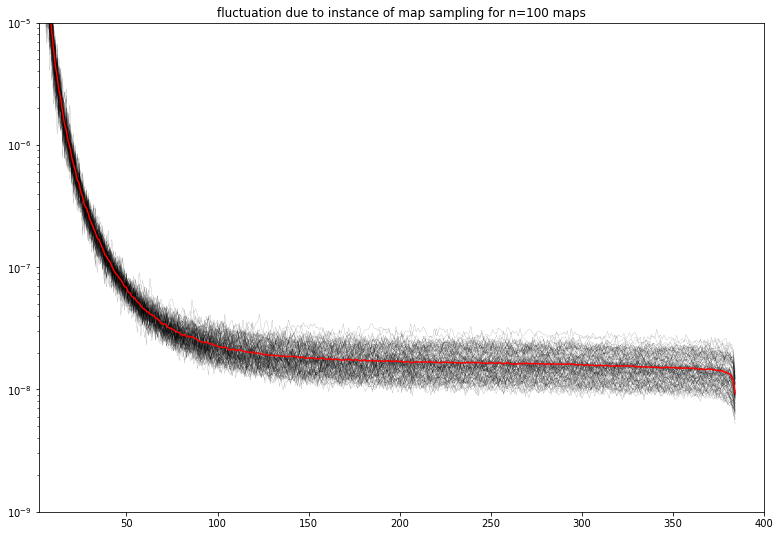

In [89]:
figure(figsize=(13,9))
for i in range(n):
    semilogy(ells, instance[i], 'k', alpha=0.5, lw=0.2)
semilogy(ells, mean_ps, 'r', label='mean power spectrum')
xlim(2,400)
ylim(1e-9,1e-5)
title('fluctuation due to instance of map sampling for n=' + str(n) +' maps')